## Import library

In [1]:
pip install yfinance

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

In [5]:
pip install pypfopt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [6]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [7]:
    pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



# Financial data 
import ta
import yfinance as yf

# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Enabling Plotly offline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Datetime and hiding warnings 
import datetime 
import warnings
warnings.filterwarnings("ignore")

## Load data 

Define the time we want to crawl

In [9]:
import pandas as pd
import yfinance as yf

# Define symbols
symbols = ["GC=F", "SI=F", "CL=F", "^GSPC"]

# Define time range
start_time = '2018-01-02'
end_time = '2024-03-05'

# DataFrame for Adj Close price
act_adj_close_df = pd.DataFrame(index=pd.date_range(start=start_time, end=end_time), columns=symbols)

for ticker in symbols:  
    stock_price_df = yf.download(ticker, start=start_time, end=end_time)
    act_adj_close_df[ticker] = stock_price_df['Adj Close']

# Print first few rows of the DataFrame
print(act_adj_close_df.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   GC=F       SI=F       CL=F        ^GSPC
2018-01-02  1313.699951  17.121000  60.369999  2695.810059
2018-01-03  1316.199951  17.184999  61.630001  2713.060059
2018-01-04  1319.400024  17.188999  62.009998  2723.989990
2018-01-05  1320.300049  17.205000  61.439999  2743.149902
2018-01-06          NaN        NaN        NaN          NaN


In [ ]:
# Define symbols
symbols = ["AAPL", "GOOG", "COST"]

# Define time range
start_time = '2018-01-02'
end_time = '2024-03-05'
for ticker in symbols:  
    stock_price_df = yf.download(ticker, start_time,end_time)
    stock_price_df.index = pd.to_datetime(stock_price_df.index)
    act_adj_close_df[ticker] = stock_price_df['Adj Close']

#### Create a dataframe include Adj Close and Volume

Crawling data from yahoo finance API to get the adj_close

In [31]:
symbols = ["GC=F", "SI=F","CL=F","^GSPC"]
# dataframe for Adj Close price
act_adj_close_df = pd.DataFrame()
for ticker in symbols:  
    stock_price_df = yf.download(ticker, start_time,end_time)
    stock_price_df.index = pd.to_datetime(stock_price_df.index)
    act_adj_close_df[ticker] = stock_price_df['Adj Close']
close = act_adj_close_df.rename(columns={"GC=F": "Gold", "SI=F": "Silver", "CL=F": "Crude Oil", "^GSPC": "S&P 500"})
close

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Gold,Silver,Crude Oil,S&P 500
Date,,,,
2018-01-02,1313.699951,17.121000,60.369999,2695.810059
2018-01-03,1316.199951,17.184999,61.630001,2713.060059
2018-01-04,1319.400024,17.188999,62.009998,2723.989990
2018-01-05,1320.300049,17.205000,61.439999,2743.149902
2018-01-08,1318.599976,17.063999,61.730000,2747.709961
...,...,...,...,...
2024-02-27,2034.000000,22.523001,78.870003,5078.180176
2024-02-28,2033.000000,22.410000,78.540001,5069.759766
2024-02-29,2045.699951,22.666000,78.260002,5096.270020


Crawling data from yahoo finance API to get the volume

In [11]:
# Danh sách các mã chứng khoán
symbols = ["GC=F", "SI=F", "CL=F", "^GSPC"]
# Khởi tạo DataFrame để lưu dữ liệu Volume
volume_df = pd.DataFrame()

# Lặp qua từng symbol và tải dữ liệu Volume từ Yahoo Finance
for symbol in symbols:
    # Tải dữ liệu giá cổ phiếu từ Yahoo Finance
    stock_price_df = yf.download(symbol, start="2018-01-01", end="2024-03-06")
    # Chuyển đổi cột index sang kiểu datetime
    stock_price_df.index = pd.to_datetime(stock_price_df.index)
    # Lưu dữ liệu Volume vào DataFrame volume_df
    volume_df[symbol] = stock_price_df['Volume']
vol = volume_df.rename(columns={"GC=F": "Gold", "SI=F": "Silver", "CL=F": "Crude Oil", "^GSPC": "S&P 500"})
vol


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Gold,Silver,Crude Oil,S&P 500
Date,,,,
2018-01-02,68,34.0,510313,3.397430e+09
2018-01-03,42,4.0,673859,3.544030e+09
2018-01-04,2,34.0,654363,3.697340e+09
2018-01-05,1,0.0,563036,3.239280e+09
2018-01-08,41,0.0,616474,3.246160e+09
...,...,...,...,...
2024-02-28,581,5854.0,330043,3.789370e+09
2024-02-29,706,517.0,317939,5.219740e+09
2024-03-01,1210,964.0,363417,4.748110e+09


#### Export to csv file

In [12]:
close.to_csv('C:/Users/Admin/Portfolioi Management/Adj_close.csv', index=False)
vol.to_csv('C:/Users/Admin/Portfolioi Management/Volume.csv', index=False)



#### Data cleaning

In [13]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [14]:
missing_data(close)


,Gold,Silver,Crude Oil,S&P 500
Total,0,2,0,2
Percent,0.0,0.128783,0.0,0.128783
Types,float64,float64,float64,float64


In [15]:
missing_data(vol)

,Gold,Silver,Crude Oil,S&P 500
Total,0,2,0,2
Percent,0.0,0.1287,0.0,0.1287
Types,int64,float64,int64,float64


In [16]:
# Check if there is negative values in data
is_negative = (close < 0).any().any()

if is_negative:
    print("We have negative values in DataFrame.")
else:
    print("No We don't have negative values in DataFrame.")


We have negative values in DataFrame.


In [17]:
# Check if there is negative values in data
is_negative = (vol < 0).any().any()

if is_negative:
    print("We have negative values in DataFrame.")
else:
    print("No We don't have negative values in DataFrame.")


No We don't have negative values in DataFrame.


In [18]:
# Handle the negative values
close_cleaned = close.mask(close < 0)

close_cleaned = close_cleaned.dropna()

print(close_cleaned)


                   Gold     Silver  Crude Oil      S&P 500
Date                                                      
2018-01-02  1313.699951  17.121000  60.369999  2695.810059
2018-01-03  1316.199951  17.184999  61.630001  2713.060059
2018-01-04  1319.400024  17.188999  62.009998  2723.989990
2018-01-05  1320.300049  17.205000  61.439999  2743.149902
2018-01-08  1318.599976  17.063999  61.730000  2747.709961
...                 ...        ...        ...          ...
2024-02-27  2034.000000  22.523001  78.870003  5078.180176
2024-02-28  2033.000000  22.410000  78.540001  5069.759766
2024-02-29  2045.699951  22.666000  78.260002  5096.270020
2024-03-01  2086.899902  23.150000  79.970001  5137.080078
2024-03-04  2117.699951  23.778999  78.739998  5130.950195

[1550 rows x 4 columns]


In [19]:
# Check if there is negative values in data
is_negative = (close_cleaned < 0).any().any()

if is_negative:
    print("We have negative values in DataFrame.")
else:
    print("No We don't have negative values in DataFrame.")


No We don't have negative values in DataFrame.


#### Configuration

In [20]:
# plotting parameters
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})

#### EDA

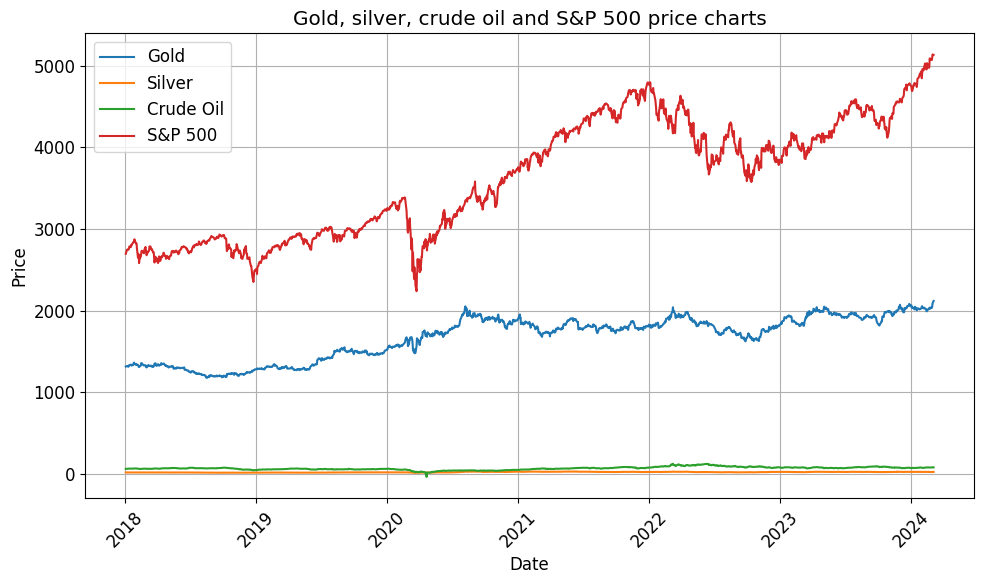

In [21]:
plt.figure(figsize=(10, 6))
for column in close.columns:
    plt.plot(close.index, close[column], label=column)

plt.title('Gold, silver, crude oil and S&P 500 price charts')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the above graph, on a day-to-day basis, the S&P 500  is the most volatile than any of the individual portfolios, which makes sense.The Gold is the second volatile portfolio, with swings not as wide S&P 500 ; it may significantly outperform the S&P 500 at times, but at other times, it significantly underperforms the S&P 500, At Large it is stabler than S&P 500. Both silver and crude oil prices are very stable, we see that they seem to be horizontal and close to zero value, they only have a few fluctuations but the fluctuations are very low.

In [22]:
vol.describe()

,Gold,Silver,Crude Oil,S&P 500
count,1554.000000,1552.000000,1.554000e+03,1.552000e+03
mean,5192.837194,1702.026418,4.545627e+05,4.190848e+09
std,29587.515315,10003.313869,2.232215e+05,1.030306e+09
min,0.000000,0.000000,0.000000e+00,1.296530e+09
25%,50.000000,8.000000,3.079208e+05,3.555508e+09
50%,192.000000,40.000000,4.035895e+05,3.967435e+09
75%,586.750000,142.250000,5.946335e+05,4.560940e+09
max,386334.000000,131415.000000,2.288230e+06,9.976520e+09


#### Portfolio Analysis


#### Daily returns

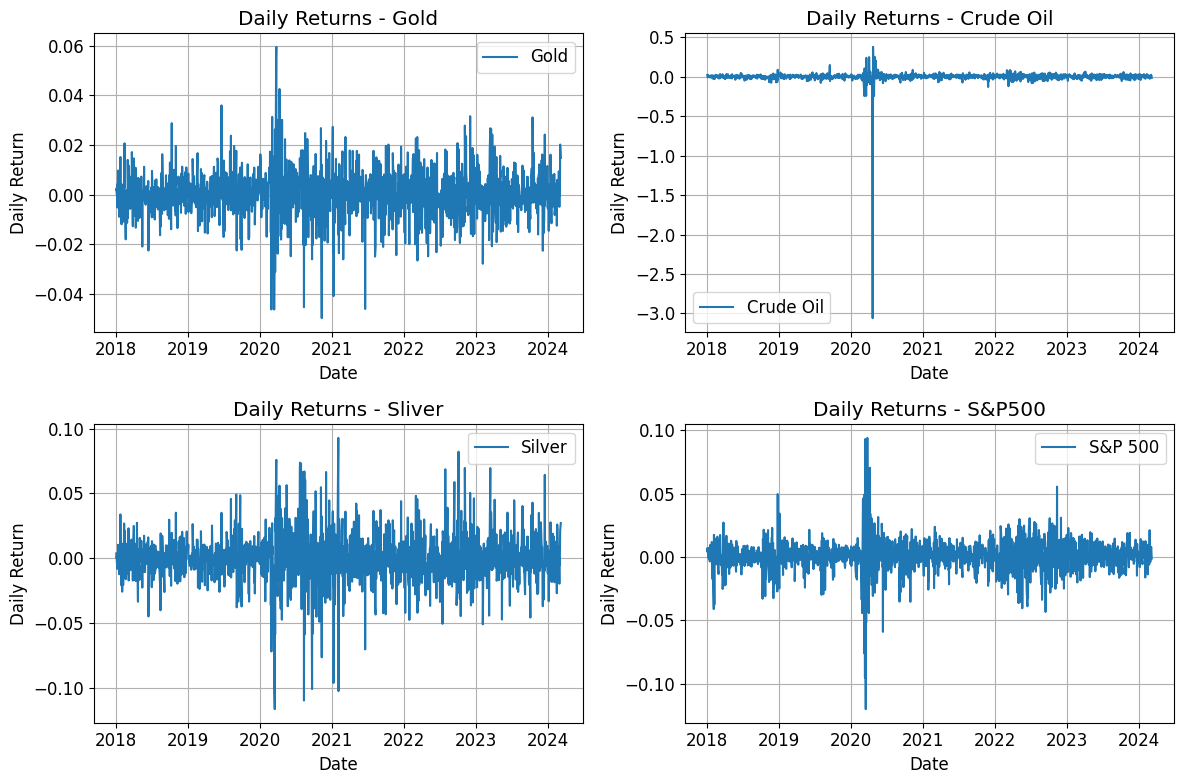

In [23]:
# caculate 4 tech companies to see their daily returns

# Chọn các cổ phiếu cần theo dõi
tickers = ['Gold', 'Crude Oil','Silver','S&P 500']



# Tính toán lợi nhuận hàng ngày
daily_returns = close.pct_change()

# Tạo 4 hình riêng biệt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Vẽ biểu đồ lợi nhuận hàng ngày của từng cổ phiếu
axes[0, 0].plot(daily_returns.index, daily_returns['Gold'], label='Gold')
axes[0, 0].set_title('Daily Returns - Gold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Daily Return')
axes[0, 0].legend()

axes[0, 1].plot(daily_returns.index, daily_returns['Crude Oil'], label='Crude Oil')
axes[0, 1].set_title('Daily Returns - Crude Oil')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Daily Return')
axes[0, 1].legend()

axes[1, 0].plot(daily_returns.index, daily_returns['Silver'], label='Silver')
axes[1, 0].set_title('Daily Returns - Sliver')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Daily Return')
axes[1, 0].legend()

axes[1, 1].plot(daily_returns.index, daily_returns['S&P 500'], label='S&P 500')
axes[1, 1].set_title('Daily Returns - S&P500')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Daily Return')
axes[1, 1].legend()

# Chỉnh layout của các hình
plt.tight_layout()
plt.show()


In [24]:
daily_returns['Gold']

Date
2018-01-02         NaN
2018-01-03    0.001903
2018-01-04    0.002431
2018-01-05    0.000682
2018-01-08   -0.001288
                ...   
2024-02-27    0.002711
2024-02-28   -0.000492
2024-02-29    0.006247
2024-03-01    0.020140
2024-03-04    0.014759
Name: Gold, Length: 1553, dtype: float64

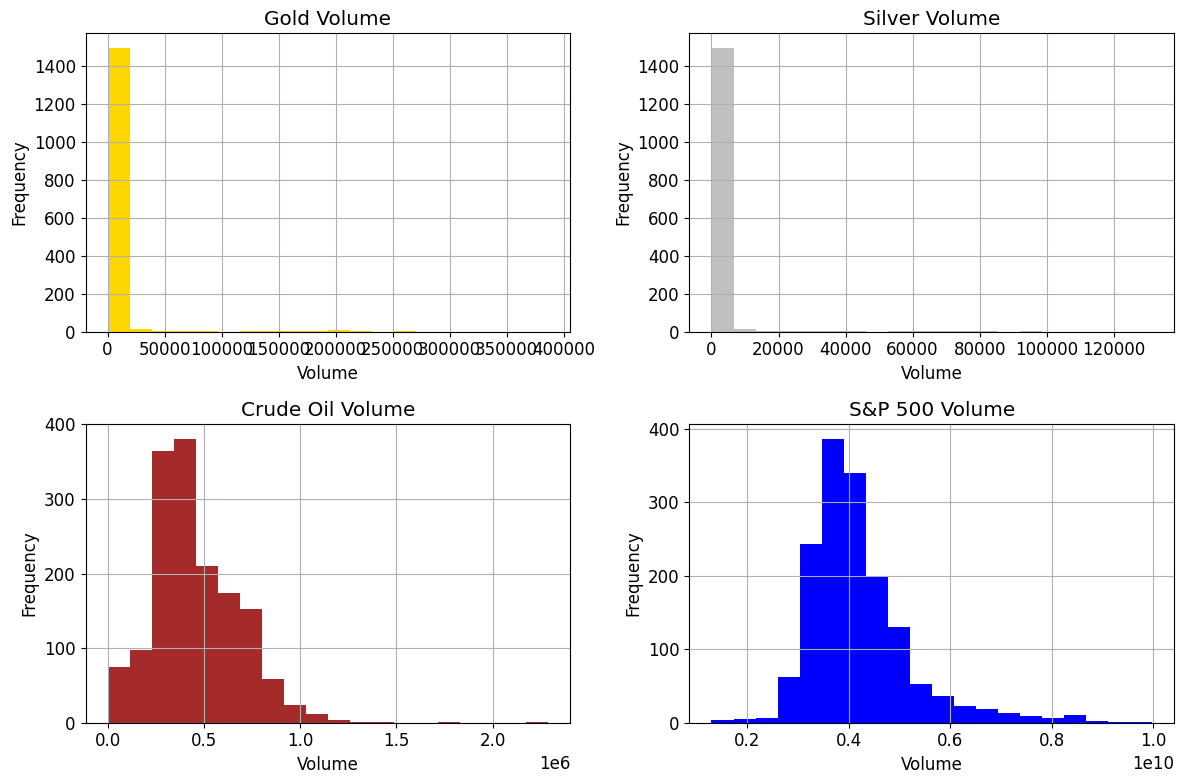

In [25]:
# Vẽ histogram cho mỗi biến
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Biểu đồ histogram cho Gold
axes[0, 0].hist(vol['Gold'], bins=20, color='gold')
axes[0, 0].set_title('Gold Volume')
axes[0, 0].set_xlabel('Volume')
axes[0, 0].set_ylabel('Frequency')

# Biểu đồ histogram cho Silver
axes[0, 1].hist(vol['Silver'], bins=20, color='silver')
axes[0, 1].set_title('Silver Volume')
axes[0, 1].set_xlabel('Volume')
axes[0, 1].set_ylabel('Frequency')

# Biểu đồ histogram cho Crude Oil
axes[1, 0].hist(vol['Crude Oil'], bins=20, color='brown')
axes[1, 0].set_title('Crude Oil Volume')
axes[1, 0].set_xlabel('Volume')
axes[1, 0].set_ylabel('Frequency')

# Biểu đồ histogram cho S&P 500
axes[1, 1].hist(vol['S&P 500'], bins=20, color='blue')
axes[1, 1].set_title('S&P 500 Volume')
axes[1, 1].set_xlabel('Volume')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [26]:
vol.describe()

,Gold,Silver,Crude Oil,S&P 500
count,1554.000000,1552.000000,1.554000e+03,1.552000e+03
mean,5192.837194,1702.026418,4.545627e+05,4.190848e+09
std,29587.515315,10003.313869,2.232215e+05,1.030306e+09
min,0.000000,0.000000,0.000000e+00,1.296530e+09
25%,50.000000,8.000000,3.079208e+05,3.555508e+09
50%,192.000000,40.000000,4.035895e+05,3.967435e+09
75%,586.750000,142.250000,5.946335e+05,4.560940e+09
max,386334.000000,131415.000000,2.288230e+06,9.976520e+09


In [27]:
close.describe()

,Gold,Silver,Crude Oil,S&P 500
count,1553.000000,1551.000000,1553.000000,1551.000000
mean,1673.086476,20.524444,67.097051,3625.199155
std,262.304484,4.159366,18.831126,716.193050
min,1176.199951,11.735000,-37.630001,2237.399902
25%,1420.099976,16.519000,55.970001,2897.130005
50%,1767.300049,21.535000,67.699997,3732.040039
75%,1885.699951,24.001500,77.940002,4263.100098
max,2117.699951,29.398001,123.699997,5137.080078


In [28]:
# Tính skewness
skewness_returns = close[['Gold', 'Silver', 'Crude Oil', 'S&P 500']].skew()
skewness_volumes = vol[['Gold', 'Silver', 'Crude Oil', 'S&P 500']].skew()
skewness_returns


Gold        -0.486149
Silver      -0.031841
Crude Oil   -0.013383
S&P 500      0.045142
dtype: float64

In [29]:
skewness_volumes

Gold         7.630021
Silver       7.741757
Crude Oil    1.070681
S&P 500      1.703856
dtype: float64

#### Cumulative Returns

In [30]:

# Concat all cumulative return to a single dataframe
gold_returns = cumulative_returns['Gold'].rename('Gold')
silver_returns = cumulative_returns['Silver'].rename('Silver')
crude_oil_returns = cumulative_returns['Crude Oil'].rename('Crude Oil')
sp500_returns = cumulative_returns['S&P 500'].rename('S&P 500')

concatenated_returns = pd.concat([gold_returns, silver_returns, crude_oil_returns, sp500_returns], axis=1)

print(concatenated_returns)


NameError: name 'cumulative_returns' is not defined

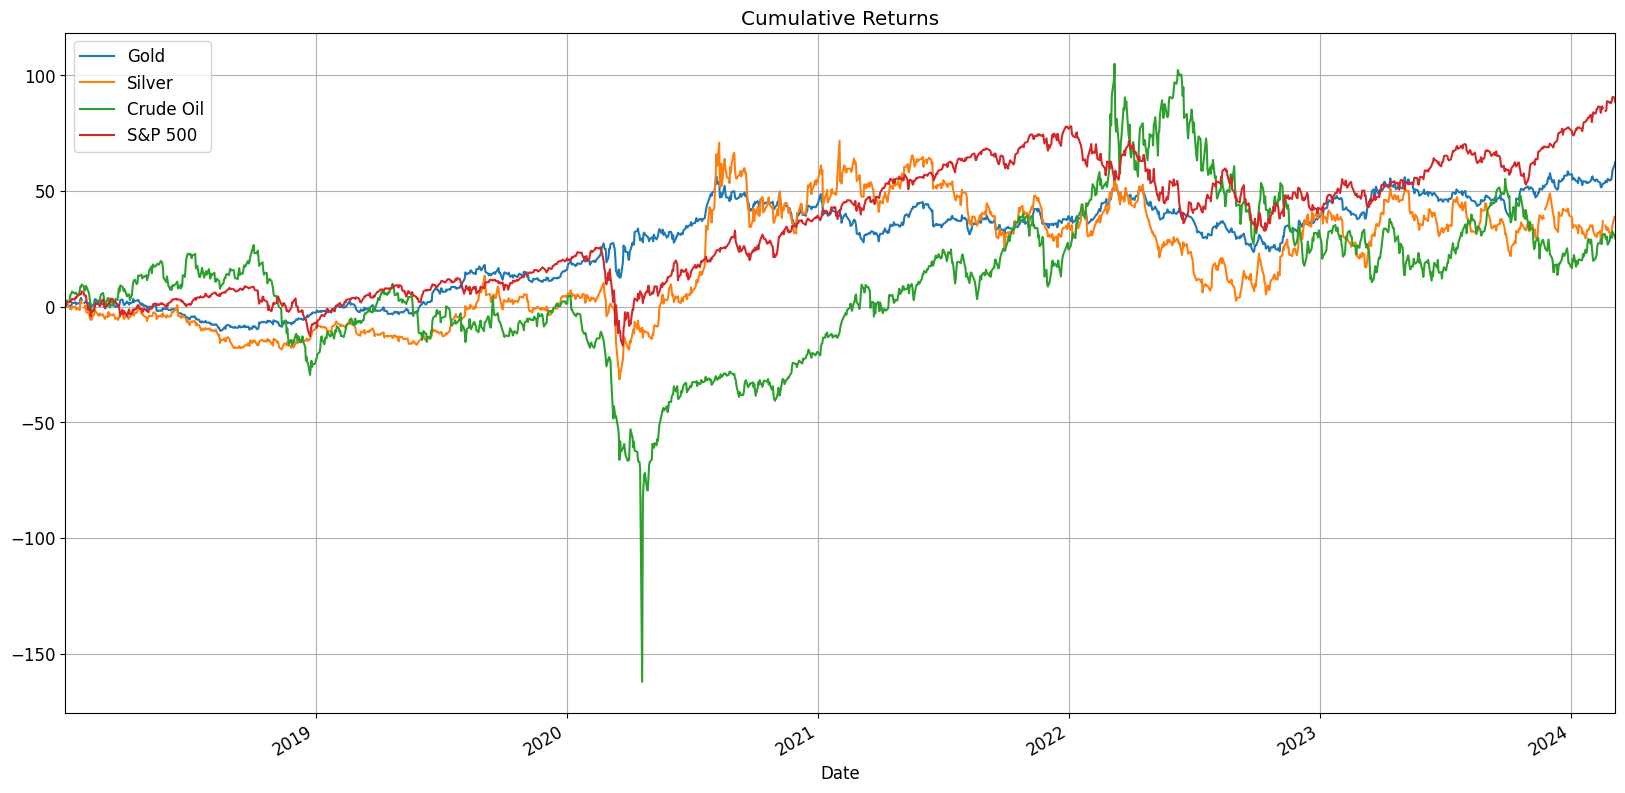

In [ ]:
# Plot Cumulative Returns:
concatenated_returns.plot(figsize = (20,10), title="Cumulative Returns")
plt.margins(x=0)

In general, all four values ​​in the cumulative profit value chart increased, although there were strong fluctuations in each period. 
- Based on the chart, we can see that from 2018 to around March 2020, the values ​​all revolved around 0, showing low fluctuation. But from April 2020 onwards, we see strong fluctuations in all four types of stocks. 
- In more detail, I have drawn 4 separate images below.

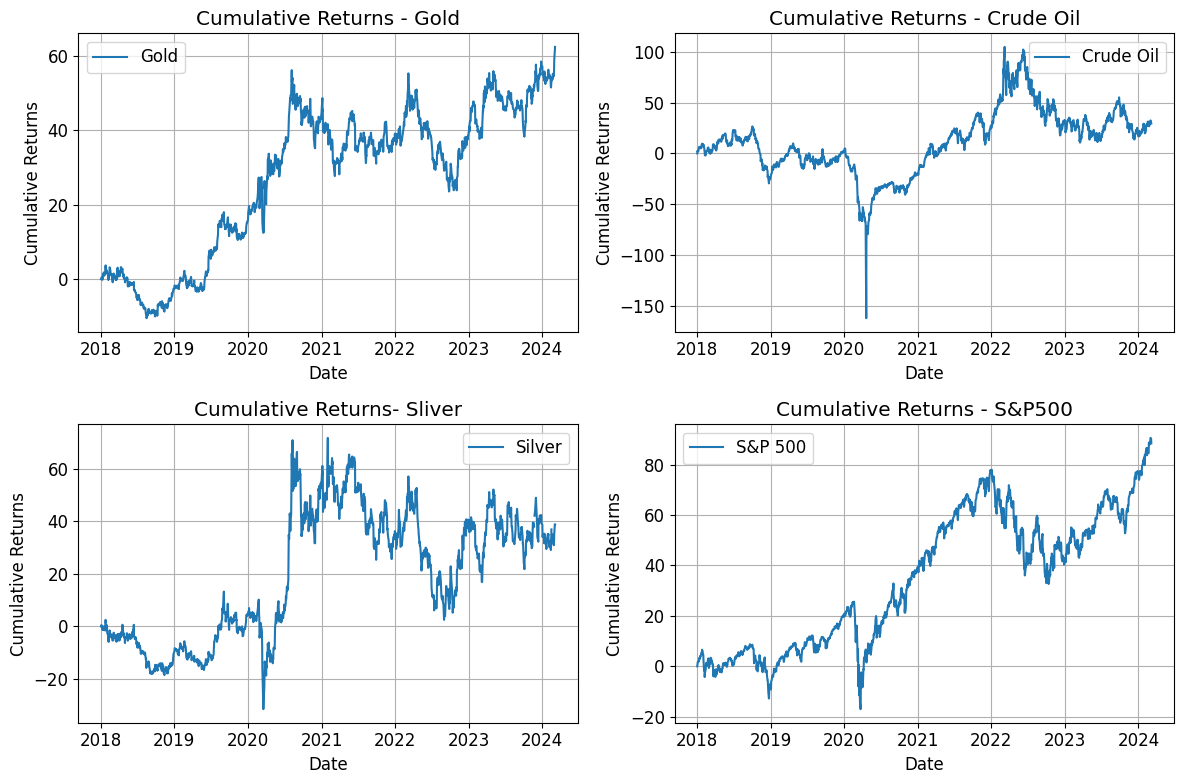

In [ ]:
# Tạo 4 hình riêng biệt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# Công thức tính lợi nhuận tích lũy
cumulative_returns = (close / close.iloc[0] - 1) * 100

# Vẽ biểu đồ lợi nhuận hàng ngày của từng cổ phiếu
axes[0, 0].plot(cumulative_returns.index, cumulative_returns['Gold'], label='Gold')
axes[0, 0].set_title('Cumulative Returns - Gold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Cumulative Returns')
axes[0, 0].legend()

axes[0, 1].plot(cumulative_returns.index, cumulative_returns['Crude Oil'], label='Crude Oil')
axes[0, 1].set_title('Cumulative Returns - Crude Oil')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cumulative Returns')
axes[0, 1].legend()

axes[1, 0].plot(cumulative_returns.index, cumulative_returns['Silver'], label='Silver')
axes[1, 0].set_title('Cumulative Returns- Sliver')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Cumulative Returns')
axes[1, 0].legend()

axes[1, 1].plot(cumulative_returns.index, cumulative_returns['S&P 500'], label='S&P 500')
axes[1, 1].set_title('Cumulative Returns - S&P500')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Cumulative Returns')
axes[1, 1].legend()

# Chỉnh layout của các hình
plt.tight_layout()
plt.show()

Comments:
Similes: from 2018-2024, the Cumulative Returns from 4 stocks have high returns
Difference:
- Gold: Overall, just only from 2018 - mid 2019, the Cumulative Returns have negative returns. After that period, The returns have increased.
- Crude Oil: In 4 images this is the volatility and risky stocks, based on the plot, from 2018 - 2019 it's spent in the downtrend returns (Worst -150 return), but when it gets over that period, it rises. At the peak of its return (over 100)
- Silver, S&P 500: Both of this have similar voliality from 2018 - early 2020, both are around the values ​​0, but then they rise again

#### Risk


<Axes: title={'center': 'Portfolio Risk'}>

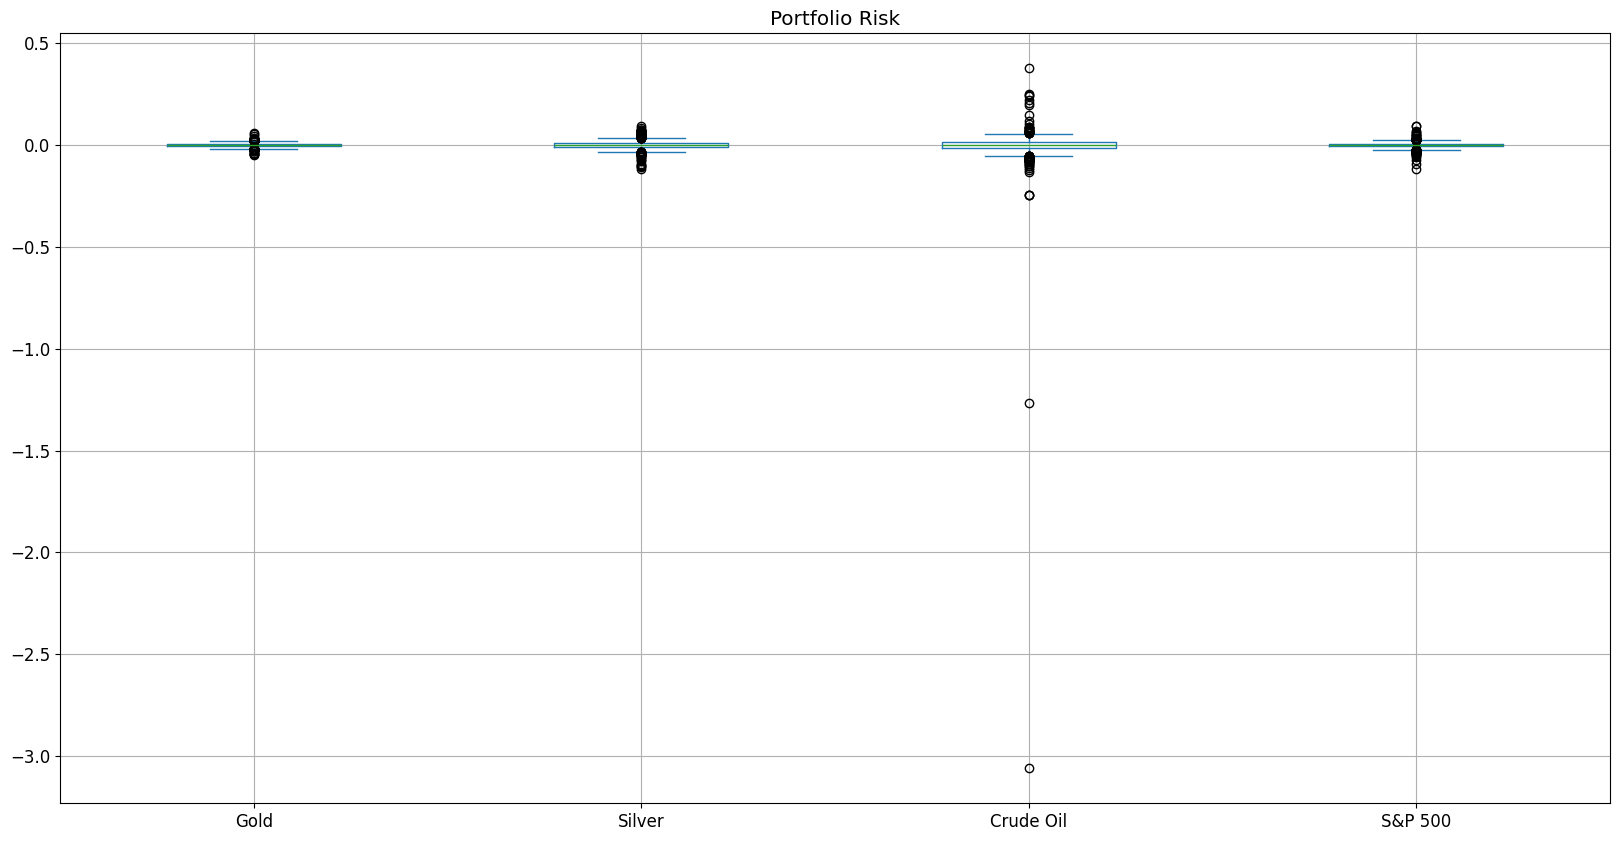

In [ ]:
# Box plot to visually show risk:
daily_returns.plot(kind = "box", figsize = (20,10), title="Portfolio Risk")

The largest spread in the above box plot is from the portfolio of Crude Oil -It also has a lot of outliers out of the box. The smallest spread is Gold, Silver, and S&P 500, which are similar, they both don't have the largets spread but they do have greatest outliers. 

In [ ]:
# Calculate the standard deviation for each portfolio:
daily_std_df = pd.DataFrame(daily_returns.std()).rename(columns = {0:"Standard Deviation"})
daily_std_df

,Standard Deviation
Gold,0.009358
Silver,0.018906
Crude Oil,0.089930
S&P 500,0.012886


In [ ]:
# Determine which portfolios are riskier than the S&P 500:
higher_std = daily_std_df[daily_std_df["Standard Deviation"] > daily_std_df.loc["S&P 500", "Standard Deviation"]]
higher_std

,Standard Deviation
Silver,0.018906
Crude Oil,0.089930


In [ ]:

# Calculate the annualized standard deviation (252 trading days):
annualized_std_df = daily_std_df * np.sqrt(252)

# Rename "Standard Deviation" column to "Annualized Standard_Deviation"
annualized_std_df.columns = ["Annualized Standard Deviation"]

# Make new dataframe with sorted data: 
annualized_std_df_sorted = annualized_std_df.sort_values("Annualized Standard Deviation", ascending=False)
annualized_std_df_sorted

,Annualized Standard Deviation
Crude Oil,1.427593
Silver,0.300123
S&P 500,0.204566
Gold,0.148551


Based on the number
Silver and Crude Oil are considered higher-risk first picks compared to the S&P 500, with the potential for greater volatility and can offer higher profit opportunities, but also come with higher risk .

## Rolling Statistics (risk over time)

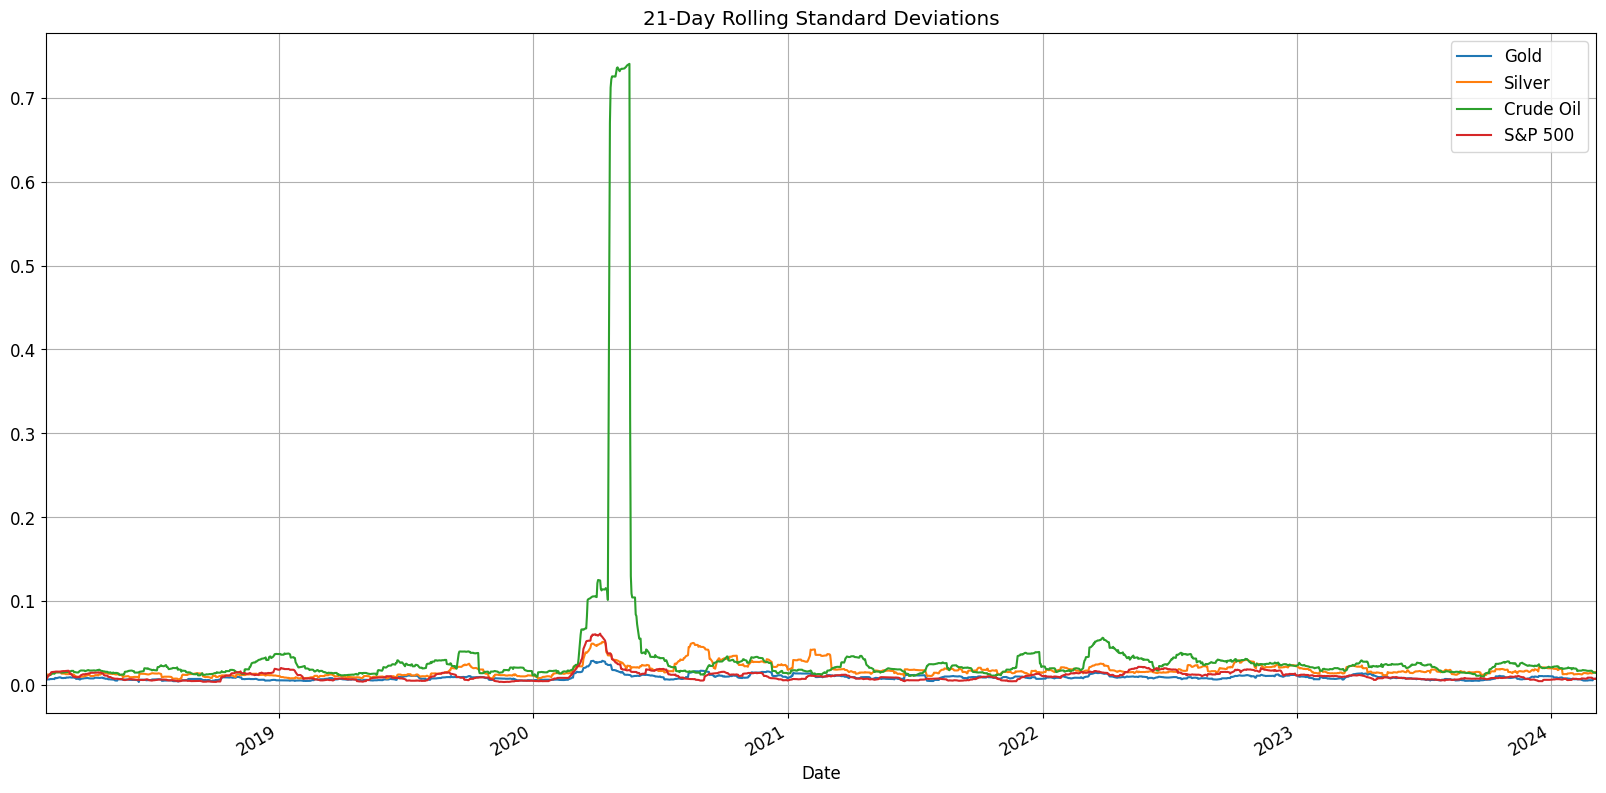

In [ ]:
# Calculate and plot the rolling standard deviations for all portfolios using a 21-day trading window:
sp500_rolling_std = daily_returns.rolling(window=21).std()
sp500_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")
plt.margins(x=0)

Wh  at we see in the above graph is that in general, all portfolios tend to see an increase in risk at the same time risk increases in the S&P 500. However, the magnitude of these increases vary greatly; for instance, Berkshire Hathaway and Tiger Global Management have a few large spikes in rolling standard deviations, indicating increased risk, while the S&P 500 only sees slight increases in risk during the same timeframe.

Heat map

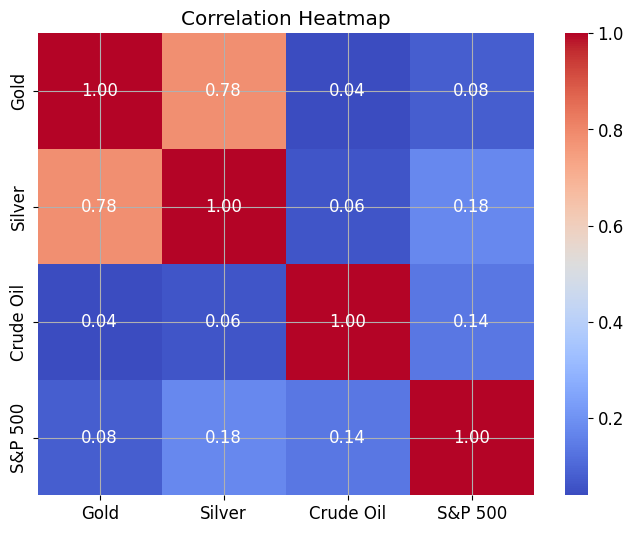

In [ ]:
# Vẽ heat map
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Construct a correlation table:
correlation = daily_returns.corr()
correlation

,Gold,Silver,Crude Oil,S&P 500
Gold,1.000000,0.782829,0.039611,0.080829
Silver,0.782829,1.000000,0.060728,0.178036
Crude Oil,0.039611,0.060728,1.000000,0.136520
S&P 500,0.080829,0.178036,0.136520,1.000000


## Build Custom Portfolio of Stocks, Evaluate, and Compare:    

Closing Prices obtained from Google Finance function within Google Sheets and comprised of 1-year's worth of data (5/2018 to 5/2019)

In [ ]:
# Tạo đối tượng Ticker cho Crude Oil
crude_oil = yf.Ticker("CL=F")

# Lấy tin tức
news = crude_oil.get_news()

# Lặp qua danh sách tin tức và in ra các thông tin cần thiết
for item in news:
    title = item['title']
    link = item['link']
    publisher = item['publisher']
    provider_publish_time = datetime.datetime.utcfromtimestamp(item['providerPublishTime']).strftime('%Y-%m-%d %H:%M:%S')
    print("Title:", title)
    print("Link:", link)
    print("Publisher:", publisher)
    print("Provider Publish Time:", provider_publish_time)
    print() 

Title: Commodities on a run: How to play Crude Oil
Link: https://finance.yahoo.com/video/commodities-run-play-crude-oil-205515909.html
Publisher: Yahoo Finance Video
Provider Publish Time: 2024-03-15 20:55:15

Title: Production cuts, geopolitical tensions drive oil rally
Link: https://finance.yahoo.com/video/production-cuts-geopolitical-tensions-drive-164151979.html
Publisher: Yahoo Finance Video
Provider Publish Time: 2024-03-15 16:41:51

Title: 3 biggest market trends occurring amid Fed rate cut optimism
Link: https://finance.yahoo.com/video/3-biggest-market-trends-occurring-204018971.html
Publisher: Yahoo Finance Video
Provider Publish Time: 2024-03-14 20:40:18

Title: Oil prices top $80 per barrel on latest inflation data
Link: https://finance.yahoo.com/video/oil-prices-top-80-per-202938904.html
Publisher: Yahoo Finance Video
Provider Publish Time: 2024-03-14 20:29:38

Title: Gas prices beginning to feel pre-summer jitters, rising in US
Link: https://finance.yahoo.com/video/gas-pri

In [ ]:
print(portfolio_monthly_profit)


Date
2018-12-31    2.559575e+24
2019-12-31    1.033021e+21
2020-12-31    4.361961e+17
2021-12-31    2.916733e+13
2022-12-31    1.934552e+10
2023-12-31    9.089738e+06
2024-12-31    1.707114e+05
Freq: YE-DEC, dtype: float64


In [ ]:
s = 'GOOG'
yf.Ticker(s).get_financials()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,-286479000.0,-981507000.0,1948860000.0,970572126.783412
TaxRateForCalcs,0.139,0.159,0.162,0.162493
NormalizedEBITDA,100032000000.0,91333000000.0,91491000000.0,55941000000.0
TotalUnusualItems,-2061000000.0,-6173000000.0,12030000000.0,5973000000.0
TotalUnusualItemsExcludingGoodwill,-2061000000.0,-6173000000.0,12030000000.0,5973000000.0
NetIncomeFromContinuingOperationNetMinorityInterest,73795000000.0,59972000000.0,76033000000.0,40269000000.0
ReconciledDepreciation,11946000000.0,13475000000.0,12441000000.0,13697000000.0
ReconciledCostOfRevenue,133332000000.0,126203000000.0,110939000000.0,84732000000.0
EBITDA,97971000000.0,85160000000.0,103521000000.0,61914000000.0
EBIT,86025000000.0,71685000000.0,91080000000.0,48217000000.0


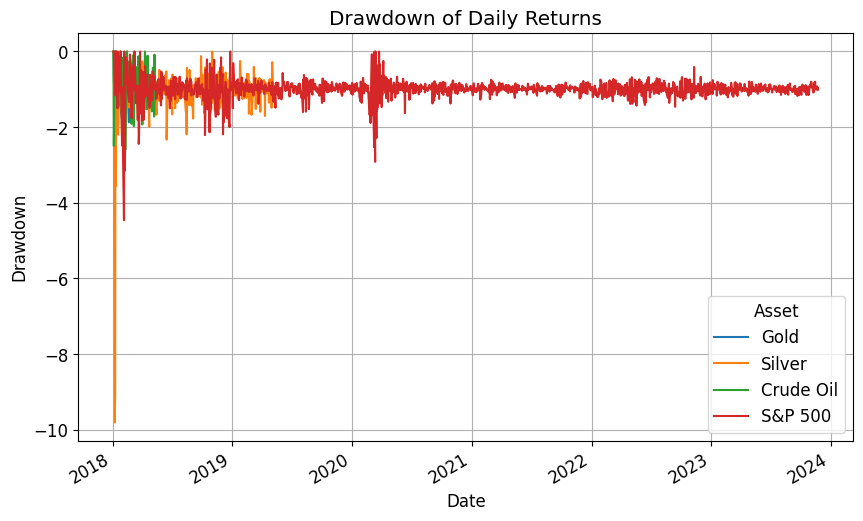

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate daily returns
daily_returns = daily_returns.pct_change()

# Calculate drawdown
cumulative_returns = (1 + daily_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max

# Plot drawdown
drawdown.plot(figsize=(10, 6))
plt.title('Drawdown of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend(title='Asset')
plt.grid(True)
plt.show()


Build custom portfolio


In [34]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yf

# Chọn ticker của các công ty
tickers = ["AAPL", "GOOG", "COST"]

# Đặt thời gian bắt đầu và kết thúc
start_date = datetime(2018, 1, 2)
end_date = datetime(2024, 3, 5)

# Đọc dữ liệu từ Yahoo Finance
yf.pdr_override()
stock_data = pdr.get_data_yahoo(tickers, start=start_date, end=end_date)

# Chỉ lấy cột 'Close'
my_stocks_df = stock_data['Close']

# Đổi tên cột để nhận diện cổ phiếu
my_stocks_df.columns = ["AAPL Close", "GOOG Close", "COST Close"]

# Loại bỏ bất kỳ hàng nào có giá trị NaN
my_stocks_df.dropna(inplace=True)

# Hiển thị 5 dòng đầu tiên của dataframe
my_stocks_df

[*********************100%%**********************]  3 of 3 completed


,AAPL Close,GOOG Close,COST Close
Date,,,
2018-01-02,43.064999,188.320007,53.250000
2018-01-03,43.057499,190.580002,54.124001
2018-01-04,43.257500,189.100006,54.320000
2018-01-05,43.750000,187.750000,55.111500
2018-01-08,43.587502,188.479996,55.347000
...,...,...,...
2024-02-27,182.630005,744.710022,140.100006
2024-02-28,181.419998,747.960022,137.429993
2024-02-29,180.750000,743.890015,139.779999


In [35]:
# Tính toán tỷ lệ biến động có trọng số cho danh mục, giả sử số lượng cổ phiếu bằng nhau cho mỗi cổ phiếu:
weights = [1/3, 1/3, 1/3]

# Tính toán tỷ lệ biến động
my_portfolio_returns = my_stocks_df.pct_change().dot(weights)

# Loại bỏ bất kỳ hàng nào có giá trị NaN
my_portfolio_returns.dropna(inplace=True)

# Hiển thị 5 dòng đầu tiên của dataframe
print(my_portfolio_returns.head())


Date
2018-01-03    0.009413
2018-01-04    0.000167
2018-01-05    0.006272
2018-01-08    0.001482
2018-01-09   -0.004116
dtype: float64


In [36]:
# Add Custom Portfolio to the larger dataframe of fund returns:
total_portfolio_returns_df = pd.concat([my_portfolio_returns, daily_returns ], axis='columns', join='inner')
total_portfolio_returns_df.rename(columns = {0:"AAPL/GOOG/COST"}, inplace = True)

# Drop nulls:
total_portfolio_returns_df.dropna(inplace=True)
total_portfolio_returns_df.head()

,AAPL/GOOG/COST,Gold,Silver,Crude Oil,S&P 500
Date,,,,,
2018-01-03,0.009413,0.001903,0.003738,0.020871,0.006399
2018-01-04,0.000167,0.002431,0.000233,0.006166,0.004029
2018-01-05,0.006272,0.000682,0.000931,-0.009192,0.007034
2018-01-08,0.001482,-0.001288,-0.008195,0.004720,0.001662
2018-01-09,-0.004116,-0.005233,-0.007501,0.019925,0.001303


## Re-run Portfolio Analysis with my custom portfolio to see how it compares to the others

In [37]:
# Risk:
total_portfolio_std = pd.DataFrame(total_portfolio_returns_df.std()).rename(columns = {0:"Standard Deviation"})
total_portfolio_std = total_portfolio_std.sort_values(by='Standard Deviation', ascending=False)
total_portfolio_std

,Standard Deviation
Crude Oil,0.090047
Silver,0.018930
AAPL/GOOG/COST,0.015322
S&P 500,0.012904
Gold,0.009368
